In [2]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [3]:
xls_file = pd.ExcelFile("Data_monthly_final.xlsx") # Read Excel
df1=xls_file.parse("FCPO") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.head()

,FCPOc1,FCPOc3,FCPOc6,FCPOc9,FCPOc12,MYR=,MYR3MV=,MYR6MV=,MYR9MV=,MYR1YV=,MYR1YNDFOR=,FCPOc1 USD,FCPOc3 USD,FCPOc6 USD,FCPOc9 USD,FCPOc12 USD
Timestamp,,,,,,,,,,,,,,,,
1980-10-31,870,885.0,920.0,960.0,NaN,2.1470,NaN,NaN,NaN,NaN,NaN,405.216581,NaN,NaN,NaN,NaN
1980-11-30,1009,1020.0,1030.0,NaN,NaN,2.1905,NaN,NaN,NaN,NaN,NaN,460.625428,NaN,NaN,NaN,NaN
1980-12-31,984,985.0,1015.0,NaN,NaN,2.2200,NaN,NaN,NaN,NaN,NaN,443.243243,NaN,NaN,NaN,NaN
1981-01-31,986,985.0,975.0,NaN,NaN,2.2390,NaN,NaN,NaN,NaN,NaN,440.375167,NaN,NaN,NaN,NaN
1981-02-28,995,960.0,948.0,NaN,NaN,2.3030,NaN,NaN,NaN,NaN,NaN,432.045158,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Timestamp'>

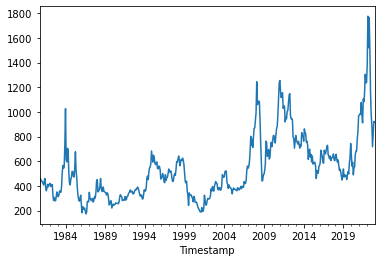

In [4]:
spot = df1["FCPOc1 USD"]
spot = spot[spot != 0]
#spot = np.log(spot).diff()
spot.plot()

In [5]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot.describe()
#spot.dropna().describe()

count     507.000000
mean      539.169074
std       258.906174
min       172.744722
25%       354.232570
50%       475.426279
75%       654.252357
max      1775.738799
Name: FCPOc1 USD, dtype: float64

In [6]:
print("Skewness spot:", scipy.stats.skew(spot.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot.dropna()), lags=[6]))

Skewness spot: 1.3711853005819945
Skewness logs: 0.22589119881524353
Kurtosis spot: 5.388879119264379
Kurtosis logs: 2.595995623823248
JB spot: Jarque_beraResult(statistic=279.427556667377, pvalue=0.0)
JB logs: Jarque_beraResult(statistic=7.759780145200423, pvalue=0.020653095398005528)
Q(6) spot:        lb_stat  lb_pvalue
6  2377.372763        0.0
Q(6) logs:        lb_stat  lb_pvalue
6  2515.154908        0.0


In [7]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot.dropna()))
print("ADF logs:", adfuller(np.log(spot.dropna())))

print("PP spot:", PhillipsPerron(spot.dropna()).summary().as_text())
print("PP logs:", PhillipsPerron(np.log(spot.dropna())).summary().as_text())



ADF spot: (-2.258242078586614, 0.18578946385494283, 12, 494, {'1%': -3.4436568932270095, '5%': -2.8674084917497074, '10%': -2.5698956806372832}, 5457.567708998221)
ADF logs: (-2.4509238490380136, 0.1278760862974691, 12, 494, {'1%': -3.4436568932270095, '5%': -2.8674084917497074, '10%': -2.5698956806372832}, -849.9735131269163)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.744
P-value                         0.067
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
PP logs:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.516
P-value                         0.112
Lags                               19
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The pro

In [8]:

print("KPSS spot:", KPSS(spot.dropna()).summary().as_text())
print("KPSS logs:", KPSS(np.log(spot.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  1.931
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS logs:     KPSS Stationarity Test Results   
Test Statistic                  2.019
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


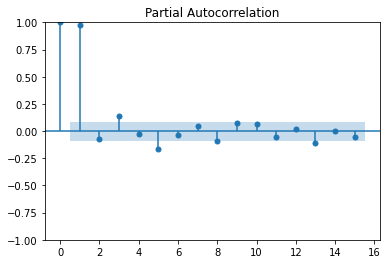

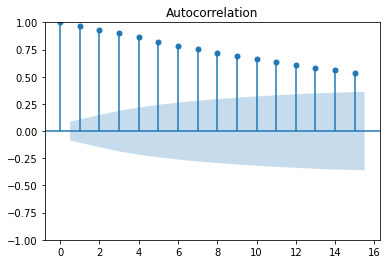

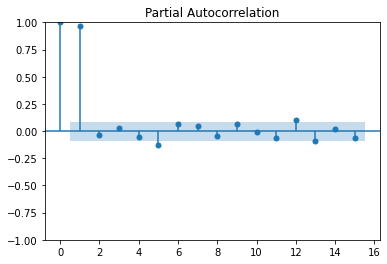

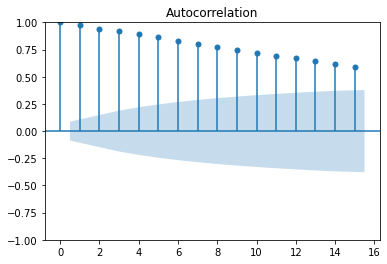

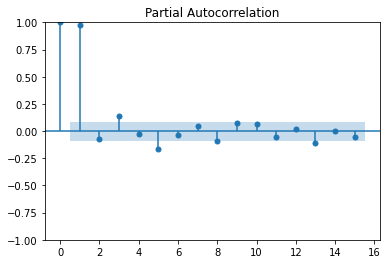

In [9]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot.dropna(), lags = 15)
plot_pacf(spot.dropna(), lags = 15)


print("ACF and PACF logs:")
plot_acf(np.log(spot.dropna()), lags = 15)
plot_pacf(np.log(spot.dropna()), lags = 15)



0.6782943507735172

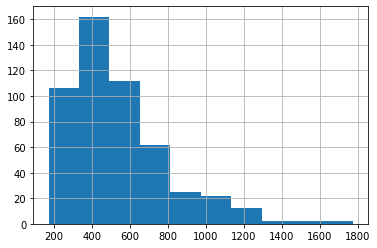

In [10]:
spot.hist()
0.6782943507735172

<AxesSubplot:>

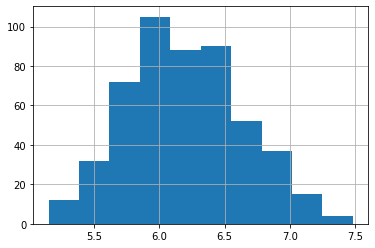

In [11]:
np.log(spot).hist()

In [12]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=338)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3646.204, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3653.433, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3654.920, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3654.713, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3651.435, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3653.985, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3651.626, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3645.459, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3651.925, Time=0.09 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3638.012, Time=0.12 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3637.701, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3636.299, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3650.951, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3637.109, Time=0.10 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept

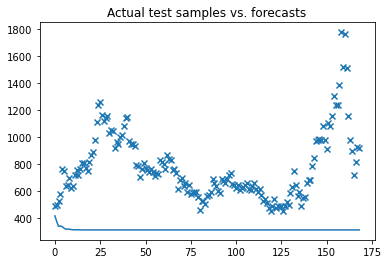

In [13]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [14]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  338
Model:               SARIMAX(4, 1, 0)   Log Likelihood               -1812.151
Date:                Tue, 27 Dec 2022   AIC                           3634.303
Time:                        20:08:51   BIC                           3653.403
Sample:                             0   HQIC                          3641.916
                                - 338                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0427      0.033      1.311      0.190      -0.021       0.107
ar.L2         -0.1092      0.055     -1.982      0.047      -0.217      -0.001
ar.L3          0.0390      0.049      0.803      0.422      -0.056       0.134
ar.L4          0.2296      0.048      4.780      0.000       0.135       0.324
sigma2      2763.1366     91.508     30.196      0.000    2583.784    2942.489
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              2776.30
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -1.03
Prob(H) (two-sided):                  0.06   Kurtosis:                        16.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

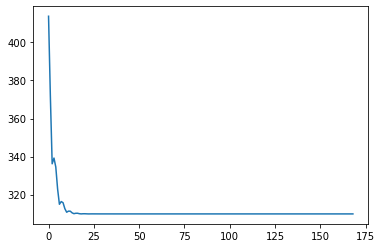

In [15]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [16]:
arima.predict(n_periods=test.shape[0])

array([413.75348396, 371.87677071, 336.21350561, 339.22236941,
       334.52170763, 322.9842389 , 314.93244366, 316.35600024,
       315.76654337, 312.62227521, 310.75886277, 311.32654426,
       311.2962573 , 310.4382137 , 309.99910233, 310.20322975,
       310.21947216, 309.98369983, 309.87898099, 309.9477653 ,
       309.95667089, 309.89131099, 309.86618242, 309.88838988,
       309.8915778 , 309.87329908, 309.86726601, 309.87422858,
       309.87520378, 309.87005216, 309.8686118 , 309.87074981,
       309.87102139, 309.86956028, 309.86922086, 309.8698675 ,
       309.86993755, 309.86952115, 309.869443  , 309.86963636,
       309.86965299, 309.86953392, 309.86951661, 309.86957393,
       309.86957744, 309.86954331, 309.86953973, 309.8695566 ,
       309.86955719, 309.8695474 , 309.86954675, 309.86955169,
       309.86955172, 309.86954891, 309.86954883, 309.86955027,
       309.86955024, 309.86954943, 309.86954944, 309.86954986,
       309.86954984, 309.8695496 , 309.86954961, 309.86

<AxesSubplot:xlabel='Timestamp'>

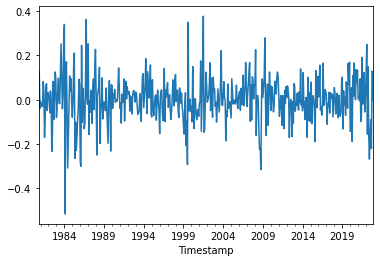

In [17]:
spot2 = np.log(spot).diff()
spot2.plot()

In [18]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot2.describe()
#spot.dropna().describe()

count    506.000000
mean       0.001620
std        0.101573
min       -0.515191
25%       -0.048127
50%        0.001146
75%        0.055788
max        0.377058
Name: FCPOc1 USD, dtype: float64

In [19]:
print("Skewness spot:", scipy.stats.skew(spot2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -0.17645586091292417
Kurtosis spot: 5.496108585164645
JB spot: Jarque_beraResult(statistic=133.9867918617241, pvalue=0.0)
Q(6) spot:     lb_stat  lb_pvalue
6  28.97423   0.000062


In [20]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-8.556136232555685, 8.948969538796301e-14, 8, 497, {'1%': -3.4435761493506294, '5%': -2.867372960189225, '10%': -2.5698767442886696}, -846.520693085874)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                -21.196
P-value                         0.000
Lags                               18
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [21]:
print("KPSS spot:", KPSS(spot2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.032
P-value                         0.969
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


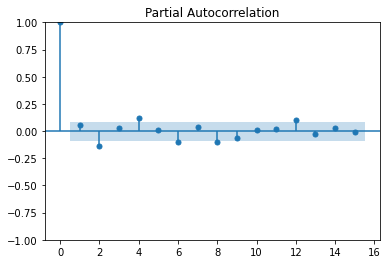

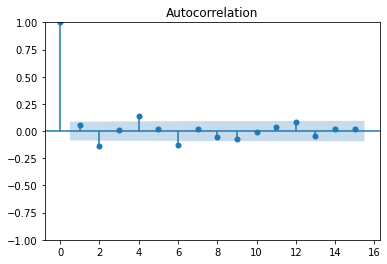

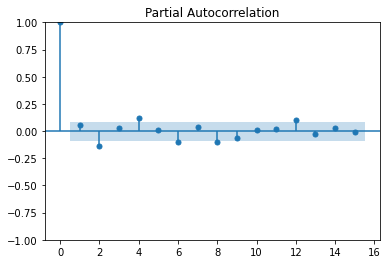

In [22]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot2.dropna(), lags = 15)
plot_pacf(spot2.dropna(), lags = 15)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

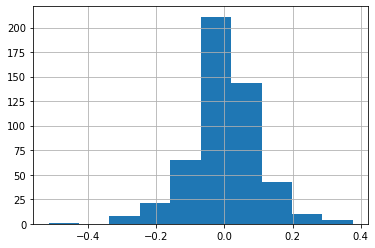

In [23]:
spot2.hist()


In [24]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=338)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-563.835, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-551.991, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-551.878, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-552.948, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-556.695, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-560.247, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-560.119, Time=0.05 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-561.061, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-554.037, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-555.120, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-558.272, Time=0.05 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-561.632, Time=0.07 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 0.765 seconds


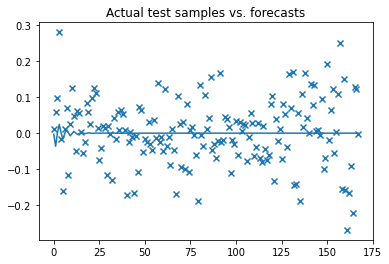

In [25]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [26]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  338
Model:               SARIMAX(2, 0, 2)   Log Likelihood                 286.918
Date:                Tue, 27 Dec 2022   AIC                           -563.835
Time:                        20:09:07   BIC                           -544.720
Sample:                             0   HQIC                          -556.217
                                - 338                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0426      0.140      0.304      0.761      -0.232       0.317
ar.L2         -0.6754      0.144     -4.674      0.000      -0.959      -0.392
ma.L1          0.0074      0.153      0.048      0.961      -0.292       0.307
ma.L2          0.4945      0.179      2.765      0.006       0.144       0.845
sigma2         0.0108      0.001     18.631      0.000       0.010       0.012
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                87.19
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.26
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

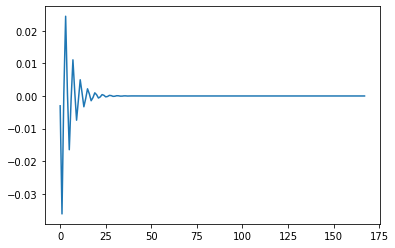

In [27]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [28]:
arima2.predict(n_periods=test2.shape[0])

array([-3.02114799e-03, -3.61757947e-02,  4.98809738e-04,  2.44537587e-02,
        7.05202441e-04, -1.64855910e-02, -1.17881015e-03,  1.10838465e-02,
        1.26848277e-03, -7.43178100e-03, -1.17341438e-03,  4.96929082e-03,
        1.00426854e-03, -3.31337591e-03, -8.19464049e-04,  2.20287519e-03,
        6.47326644e-04, -1.46019792e-03, -4.99419061e-04,  9.64909663e-04,
        3.78418287e-04, -6.35557005e-04, -2.82661202e-04,  4.17198614e-04,
        2.08683254e-04, -2.72875705e-04, -1.52569557e-04,  1.77793794e-04,
        1.10619454e-04, -1.15364818e-04, -7.96266923e-05,  7.45221215e-05,
        5.69542207e-05, -4.79038561e-05, -4.05072983e-05,  3.06272238e-05,
        2.86630945e-05, -1.94636244e-05, -2.01879918e-05,  1.22850877e-05,
        1.41581437e-05, -7.69378918e-06, -9.89003245e-06,  4.77479042e-06,
        6.88303209e-06, -2.93149192e-06, -4.77360475e-06,  1.77645283e-06,
        3.29971258e-06, -1.05916902e-06, -2.27370462e-06,  6.18451057e-07,
        1.56197564e-06, -

In [ ]:
#cointegration tests

#normalized cv
#LR test

In [ ]:
#correlaatiomatriisi

In [ ]:
#np.argwhere(np.isnan(x))